In [9]:
import mplhep as hep
import matplotlib.pyplot as plt

import flux_tool as ft
from flux_tool.config import AnalysisConfig
from flux_tool.preprocessor import Preprocessor
from flux_tool.flux_systematics_analysis import FluxSystematicsAnalysis

In [10]:
cfg = AnalysisConfig.from_str(
"""
output_file_name = "out.root"

[Inputs]
# directory = "/path/to/directory/containing/input/histograms"
directory = "/home/apwood/Projects/flux_studies/2024-09-10_icarus_1B_POT/inputs"
nominal_id = 15
fhc.15 = "out_450.37_7991.98_79512.66_0015_me000z200i.root"
rhc.15 = "out_450.37_7991.98_79512.66_0015_me000z-200i.root"
fhc.8  = "out_450.37_7991.98_79512.66_008_me000z202i.root"  # horn current 200+2kA
fhc.9  = "out_450.37_7991.98_79512.66_009_me000z198i.root"  # horn current 200-2kA
rhc.8  = "out_450.37_7991.98_79512.66_008_me000z-198i.root" # horn current -200+2kA
rhc.9  = "out_450.37_7991.98_79512.66_009_me000z-202i.root" # horn current -200-2kA

[Binning]
# Histogram bin edges for each neutrino flavor.
# Accepts:
#    1. an integer number of bins (between 0 and 20 GeV)
#    2. An array of bin edges (NOTE: they can be variable bin widths, but must be monotonically increasing)
#    3. An array of arrays where the inner arrays are [start, stop, step] for fixed bin widths.
#    4. If unspecified, then fixed bin widths of 100 MeV is applied along the [0, 20] GeV interval.
nue = 200

nuebar = [
  0.0,
  0.2,
  0.4,
  0.6,
  0.8,
  1.0,
  1.5,
  2.0,
  2.5,
  3.0,
  3.5,
  4.0,
  6.0,
  8.0,
  12.0,
]

numu = [[0.0, 6.0, 0.1], [6.0, 20.0, 0.5]]

numubar = [[0.0, 6.0, 0.1], [6.0, 20.0, 0.5]]

  [PPFX]
# enable/disable specific PPFX reweight categories from
# appearing in the fractional uncertainty directory
# true = included, false = excluded
[PPFX.enabled]
total = true
attenuation = true
mesinc = true
mesinc_parent_K0 = true
mesinc_parent_Km = true
mesinc_parent_Kp = true
mesinc_parent_pim = true
mesinc_parent_pip = true
mesinc_daughter_K0 = true
mesinc_daughter_Km = true
mesinc_daughter_Kp = true
mesinc_daughter_pim = true
mesinc_daughter_pip = true
mippnumi = false
nua = true
pCfwd = false
pCk = true
pCpi = true
pCnu = true
pCQEL = false
others = true
thintarget = false

[Plotting]
draw_label = true                   # whether or not to draw the experiment label, e.g., ICARUS Preliminary
experiment = "ICARUS"
stage = "Preliminary"
neutrino_energy_range = [0.0, 6.0]  # horizontal axis limits in [GeV]
flux_prediction_bullets = false     # whether or not to draw bullets or lines with error band for flux prediction

[Plotting.enabled]
# Enable/disable specific plots from the visualization output
uncorrected_flux = true
flux_prediction = true
flux_prediction_parent_spectra = true
flux_prediction_parent_spectra_stacked = true
ppfx_universes = true
hadron_uncertainties = true
hadron_uncertainties_meson = true
hadron_uncertainties_meson_only = true
pca_scree_plot = true
pca_mesinc_overlay = true
pca_top_components = true
pca_variances = true
pca_components = true
hadron_covariance_matrices = "total"
hadron_correlation_matrices = true
beam_uncertainties = true
beam_covariance_matrices = true
beam_correlation_matrices = true
beam_systematic_shifts = true
"""
)

In [11]:
data = Preprocessor(cfg)

Output()

In [12]:
data.nominal_flux_df

,flux,stat_uncert,bin,category,neutrino_mode,horn_polarity,run_id
0,7.030468e-07,4.452560e-10,1,pipm,numu,fhc,15
1,1.156198e-06,7.476330e-10,2,pipm,numu,fhc,15
2,1.030822e-06,7.746271e-10,3,pipm,numu,fhc,15
3,5.480481e-07,6.965780e-10,4,pipm,numu,fhc,15
4,2.841572e-07,6.260814e-10,5,pipm,numu,fhc,15
...,...,...,...,...,...,...,...
9,1.511025e-09,3.441220e-11,10,nominal,nuebar,rhc,9
10,9.042014e-10,3.085486e-11,11,nominal,nuebar,rhc,9
11,1.190182e-09,3.649457e-11,12,nominal,nuebar,rhc,9
12,1.635896e-10,1.461596e-11,13,nominal,nuebar,rhc,9


In [13]:
data.ppfx_correction_df

,flux,stat_uncert,bin,category,neutrino_mode,horn_polarity,run_id,universe
0,6.879407e-07,4.452584e-10,1,pCpi,numu,fhc,15,0.0
1,1.123711e-06,7.461185e-10,2,pCpi,numu,fhc,15,0.0
2,1.010121e-06,7.665749e-10,3,pCpi,numu,fhc,15,0.0
3,5.531251e-07,6.910501e-10,4,pCpi,numu,fhc,15,0.0
4,3.000497e-07,6.221191e-10,5,pCpi,numu,fhc,15,0.0
...,...,...,...,...,...,...,...,...
9,8.031024e-10,1.983813e-11,10,total,nuebar,rhc,15,99.0
10,4.420772e-10,2.218035e-11,11,total,nuebar,rhc,15,99.0
11,5.549331e-10,2.053240e-11,12,total,nuebar,rhc,15,99.0
12,7.708617e-11,7.473846e-12,13,total,nuebar,rhc,15,99.0


In [14]:
ana = FluxSystematicsAnalysis(
    nominal_flux_df=data.nominal_flux_df,
    ppfx_correction_df=data.ppfx_correction_df,
    bin_edges=cfg.bin_edges,
    cfg=cfg,
    )

ana.run()

In [15]:
ana.beam_systematics.fractional_uncertainties

category  horn_polarity  neutrino_mode  bin
8         fhc            nue            1      0.000849
                                        2      0.034601
                                        3      0.014524
                                        4      0.016404
                                        5      0.029330
                                                 ...   
total     rhc            numubar        83     1.624970
                                        84          NaN
                                        85          NaN
                                        86          NaN
                                        87          NaN
Length: 2328, dtype: float64

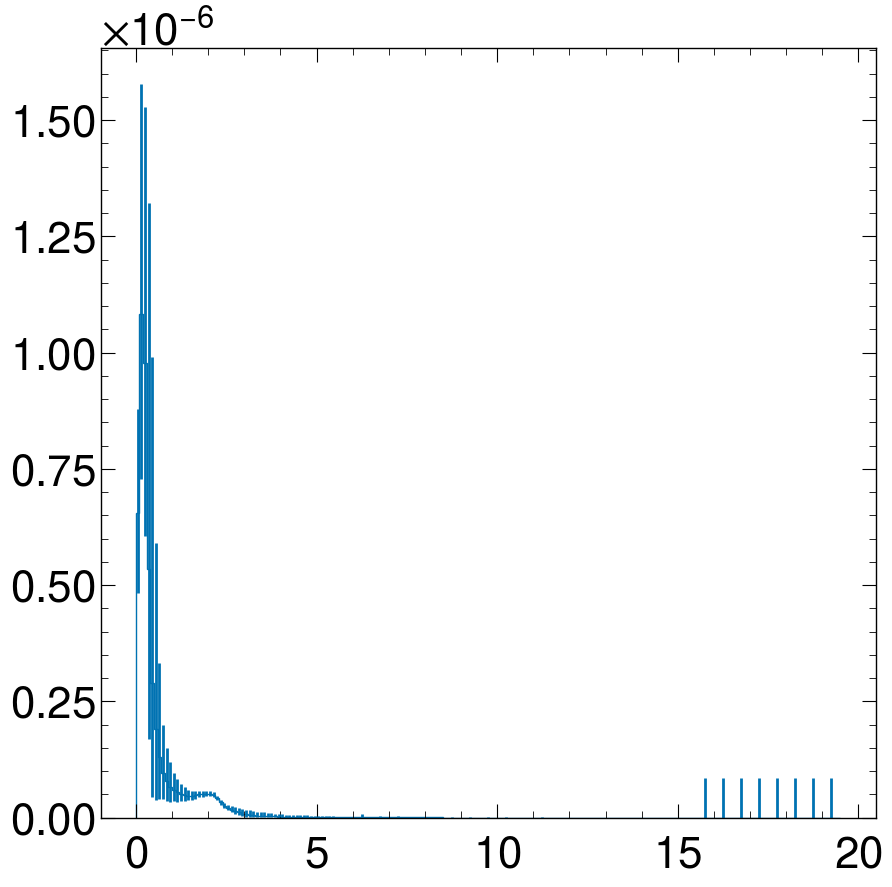

In [16]:
fhc_numu_df = ana.flux_prediction.loc["fhc", "numu"]
flux_pred = ft.helpers.convert_pandas_to_th1(fhc_numu_df["mean"], ana.bin_edges["numu"], uncerts=fhc_numu_df["sigma"])

hep.histplot(flux_pred)

plt.show()

In [17]:
ana.total_uncertainties_in_range(0.3, 6)

,nue,nuebar,nue+nuebar,numu,numubar,numu+numubar,nue+nuebar/numu+numubar
fhc,0.184547,0.369376,0.245480,0.532770,0.669569,0.575999,0.343169
rhc,0.254840,0.311393,0.281445,0.581878,0.673413,0.635309,0.366175
